In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('drink.txt')
df.head()

,calorie,caffeine,sodium,price
0,207.2,3.3,15.5,2.8
1,36.8,5.9,12.9,3.3
2,72.2,7.3,8.2,2.4
3,36.7,0.4,10.5,4.0
4,121.7,4.1,9.2,3.5


In [6]:
# 划分饮料分为几种类别
# 手肘法
# k=1,sse指标
model = KMeans(n_clusters=1)
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
model.inertia_ # sse指标

55867.97687499999

Text(0, 0.5, 'SSE')

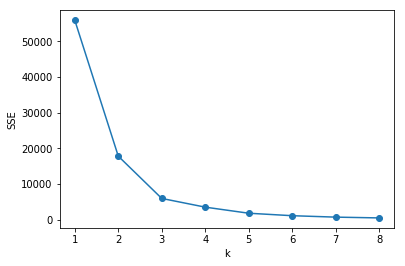

In [11]:
# 肘部法SSE变化 ， 由大变小时， K 的最好取值.
sse = []
for k in range(1, 9):
    model = KMeans(k)
    model.fit(df)
    sse.append(model.inertia_)
plt.plot(range(1, 9), sse, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')

In [12]:
# 轮廓系数  取值 1到-1   数值越接近1 效果越好
from sklearn.metrics import silhouette_score

In [13]:
# 求K=2轮廓系数
model = KMeans(2)
model.fit(df)
label = model.predict(df) # 预测每个样本点，归属于哪一个簇
silhouette_score(df, label) # 真实值，预测结果

0.5297232592399546

Text(0, 0.5, 'lunkuo')

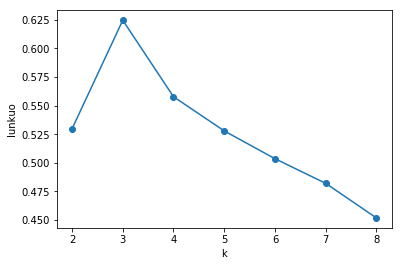

In [14]:
ss_list = []
for k in range(2, 9):
    model = KMeans(k)
    model.fit(df)
    label = model.predict(df)
    ss = silhouette_score(df, label)
    ss_list.append(ss)
plt.plot(range(2, 9), ss_list, marker='o')
plt.xlabel('k')
plt.ylabel('lunkuo')

In [15]:
# 结论 聚类为3个簇时，效果最好
model = KMeans(3)
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
model.cluster_centers_# 聚类中心

array([[ 38.525     ,   4.55      ,   9.825     ,   2.65      ],
       [203.1       ,   1.65      ,  13.05      ,   3.15      ],
       [113.2       ,   2.85      ,   8.85      ,   3.03333333]])

In [17]:
model.labels_

array([1, 0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0, 2, 2])